In [18]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Activation, MaxPool2D , ZeroPadding2D

from tensorflow.keras.layers import BatchNormalization, Flatten, Reshape, Conv2DTranspose, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

In [25]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()


In [19]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 7s 2us/step


In [26]:
X_train, X_valid,  y_train, y_valid = train_test_split(train_X,train_y , 
                                  random_state=104,  
                                   test_size=0.25,  
                                   shuffle=True) 

In [20]:
Train_images,valid_images , Train_labels ,valid_labels   = train_test_split(train_images,train_labels , 
                                   random_state=104,  
                                   test_size=0.25,  
                                   shuffle=True) 

# Normalize data

In [27]:
X_train, X_valid , test_X  = X_train/255, X_valid/255 , test_X/255 
Train_images, valid_images ,  test_images = Train_images/255 , valid_images/255 ,  test_images/255


In [24]:
H = 28
W = 28
C = 1

latent_dim = 6

# Encoder
inputs = Input(shape=(H, W, C), name="inputs")
x = inputs

x = Conv2D(32, (3, 3), padding="same")(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPool2D((2, 2))(x)

x = Conv2D(64, (3, 3), padding="same")(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPool2D((2, 2))(x)

x = Flatten()(x)
units = x.shape[1]
latent = Dense(latent_dim, name="latent")(x)  

# Decoder
x = Dense(units)(latent)
x = LeakyReLU(alpha=0.2)(x)
x = Reshape((7, 7, 64))(x)

x = ZeroPadding2D(padding=(1, 1))(x)  
x = Conv2DTranspose(64, (3, 3), strides=2, padding="valid")(x)
x = LeakyReLU(alpha=0.2)(x)

x = ZeroPadding2D(padding=(2, 2))(x)  #
x = Conv2DTranspose(32, (3, 3), strides=1, padding="valid")(x)
x = LeakyReLU(alpha=0.2)(x)
x = ZeroPadding2D(padding=(1, 1))(x)  

x = Conv2DTranspose(1, (2, 2), strides=(1, 1), padding="valid")(x)
outputs = Activation("sigmoid", name="outputs")(x)

autoencoder = Model(inputs, outputs)
autoencoder.compile(
    optimizer=Adam(1e-3),
    loss='binary_crossentropy',  
    metrics=['mean_absolute_error', 'mean_squared_error']  
)
autoencoder.summary()



history_model = autoencoder.fit(
    X_train,
    X_train,
    epochs=10,
    batch_size=256,
    shuffle=False,
    validation_data=(X_valid, X_valid)
)


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_20 (LeakyReLU)      │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_21 (LeakyReLU)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent (Dense)                  │ (None, 6)              │        18,822 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3136)           │        21,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_22 (LeakyReLU)      │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_12               │ (None, 9, 9, 64)       │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_12             │ (None, 19, 19, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_23 (LeakyReLU)      │ (None, 19, 19, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_13               │ (None, 23, 23, 64)     │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_13             │ (None, 25, 25, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_24 (LeakyReLU)      │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_14               │ (None, 27, 27, 32)     │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_14             │ (None, 28, 28, 1)      │           129 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Activation)            │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,111 (449.65 KB)

 Trainable params: 115,111 (449.65 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_20 (LeakyReLU)      │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_21 (LeakyReLU)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent (Dense)                  │ (None, 6)              │        18,822 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,638 (147.02 KB)

 Trainable params: 37,638 (147.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 77s 427ms/step - loss: 0.5546 - mean_absolute_error: 0.3725 - mean_squared_error: 0.1699 - val_loss: 0.3158 - val_mean_absolute_error: 0.1973 - val_mean_squared_error: 0.0757
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 82s 428ms/step - loss: 0.2961 - mean_absolute_error: 0.1810 - mean_squared_error: 0.0701 - val_loss: 0.2635 - val_mean_absolute_error: 0.1542 - val_mean_squared_error: 0.0612
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 83s 431ms/step - loss: 0.2590 - mean_absolute_error: 0.1502 - mean_squared_error: 0.0598 - val_loss: 0.2489 - val_mean_absolute_error: 0.1421 - val_mean_squared_error: 0.0563
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 82s 431ms/step - loss: 0.2464 - mean_absolute_error: 0.1398 - mean_squared_error: 0.0553 - val_loss: 0.2396 - val_mean_absolute_error: 0.1352 - val_mean_squared_error: 0.0527
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 81s 423ms/step - loss: 0.2374 - mean_absolute_error: 0.1335 - mean_squared_error: 0.0518 - val_loss:

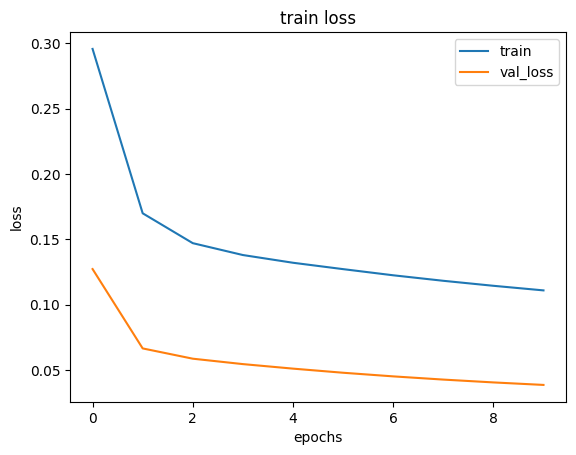

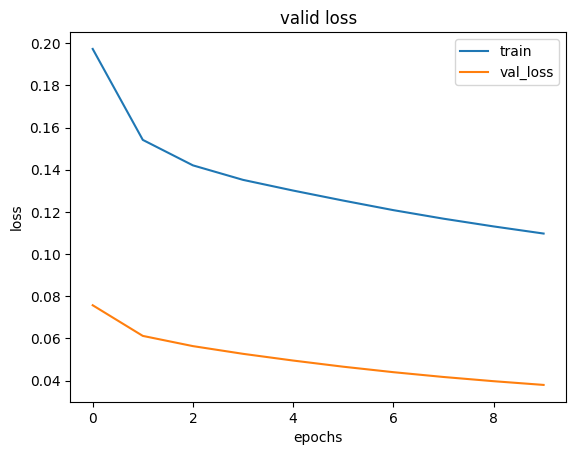

In [25]:
plt.plot(history_model.history['mean_absolute_error'], label='train')
plt.plot(history_model.history['mean_squared_error'], label='val_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title('train loss')
plt.legend()
plt.show()

plt.plot(history_model.history['val_mean_absolute_error'], label='train')
plt.plot(history_model.history['val_mean_squared_error'], label='val_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title('valid loss')
plt.legend()
plt.show()


# Evaluate the model for mnist data

In [28]:
test_loss, test_mae, test_mse = autoencoder.evaluate(test_X, test_X, batch_size=256)

print(f"Test Loss (Binary Crossentropy): {test_loss}")
print(f"Test Mean Absolute Error (MAE): {test_mae}")
print(f"Test Mean Squared Error (MSE): {test_mse}")


40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - loss: 0.1999 - mean_absolute_error: 0.1096 - mean_squared_error: 0.0377
Test Loss (Binary Crossentropy): 0.20112481713294983
Test Mean Absolute Error (MAE): 0.1093132346868515
Test Mean Squared Error (MSE): 0.0376676507294178


# testing model for mnist data

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


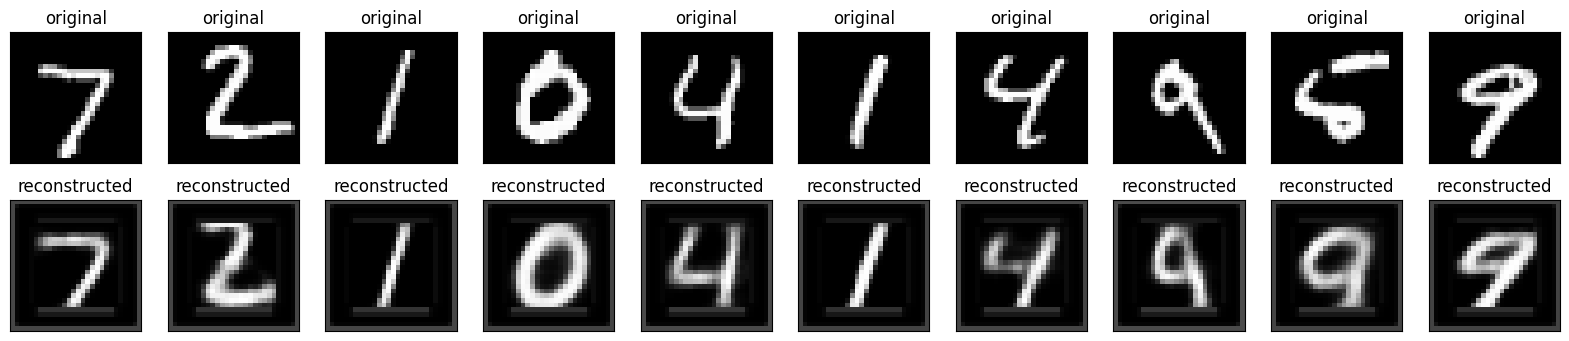

In [29]:
test_pred_y = autoencoder.predict(test_X)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_X[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

  # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_pred_y[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# training the fashion datasets

In [33]:
H = 28
W = 28
C = 1

latent_dim = 4

# Encoder
inputs = Input(shape=(H, W, C), name="inputs")
x = inputs

x = Conv2D(32, (3, 3), padding="same")(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPool2D((2, 2))(x)

x = Conv2D(64, (3, 3), padding="same")(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPool2D((2, 2))(x)

x = Flatten()(x)
units = x.shape[1]
latent = Dense(latent_dim, name="latent")(x)  # Latent layer

# Decoder
x = Dense(units)(latent)
x = LeakyReLU(alpha=0.2)(x)
x = Reshape((7, 7, 64))(x)

x = ZeroPadding2D(padding=(1, 1))(x)  
x = Conv2DTranspose(64, (3, 3), strides=2, padding="valid")(x)
x = LeakyReLU(alpha=0.2)(x)

x = ZeroPadding2D(padding=(2, 2))(x)  
x = Conv2DTranspose(32, (3, 3), strides=1, padding="valid")(x)
x = LeakyReLU(alpha=0.2)(x)
x = ZeroPadding2D(padding=(1, 1))(x)  
x = Conv2DTranspose(1, (2, 2), strides=(1, 1), padding="valid")(x)
outputs = Activation("sigmoid", name="outputs")(x)

# Autoencoder model
autoencoder2 = Model(inputs, outputs)
autoencoder2.compile(
    optimizer=Adam(1e-3),
    loss='binary_crossentropy', 
    metrics=['mean_absolute_error', 'mean_squared_error'] 
)
autoencoder2.summary()



# Train the autoencoder
history_model = autoencoder2.fit(
    Train_images,
    Train_images,
    epochs=10,
    batch_size=256,
    shuffle=False,
    validation_data=(valid_images, valid_images)
)


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                           

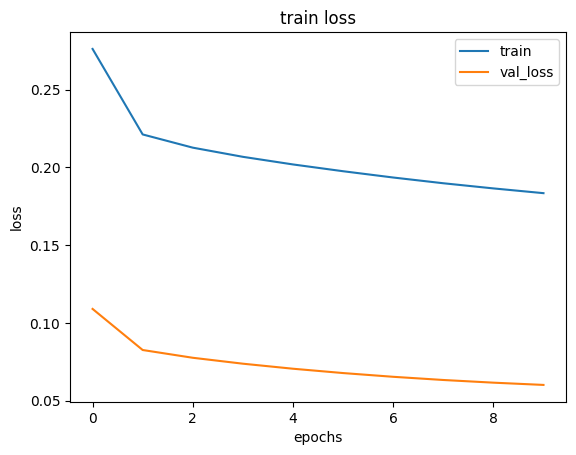

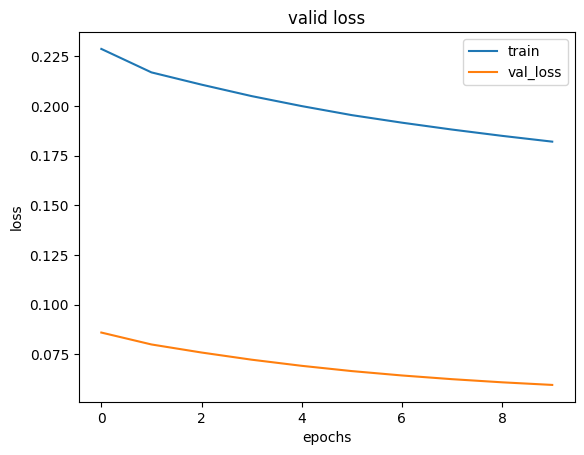

In [55]:
plt.plot(history_fashion_model.history['mean_absolute_error'], label='train')
plt.plot(history_fashion_model.history['mean_squared_error'], label='val_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title('train loss')
plt.legend()
plt.show()

plt.plot(history_fashion_model.history['val_mean_absolute_error'], label='train')
plt.plot(history_fashion_model.history['val_mean_squared_error'], label='val_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title('valid loss')
plt.legend()
plt.show()


# evaluate model for fashion dataset

In [56]:
test_loss, test_mae, test_mse = autoencoder2.evaluate(test_images, test_images, batch_size=256)

print(f"Test Loss (Binary Crossentropy): {test_loss}")
print(f"Test Mean Absolute Error (MAE): {test_mae}")
print(f"Test Mean Squared Error (MSE): {test_mse}")


40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - loss: 0.4400 - mean_absolute_error: 0.1820 - mean_squared_error: 0.0595
Test Loss (Binary Crossentropy): 0.43983936309814453
Test Mean Absolute Error (MAE): 0.18203438818454742
Test Mean Squared Error (MSE): 0.05948041379451752


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


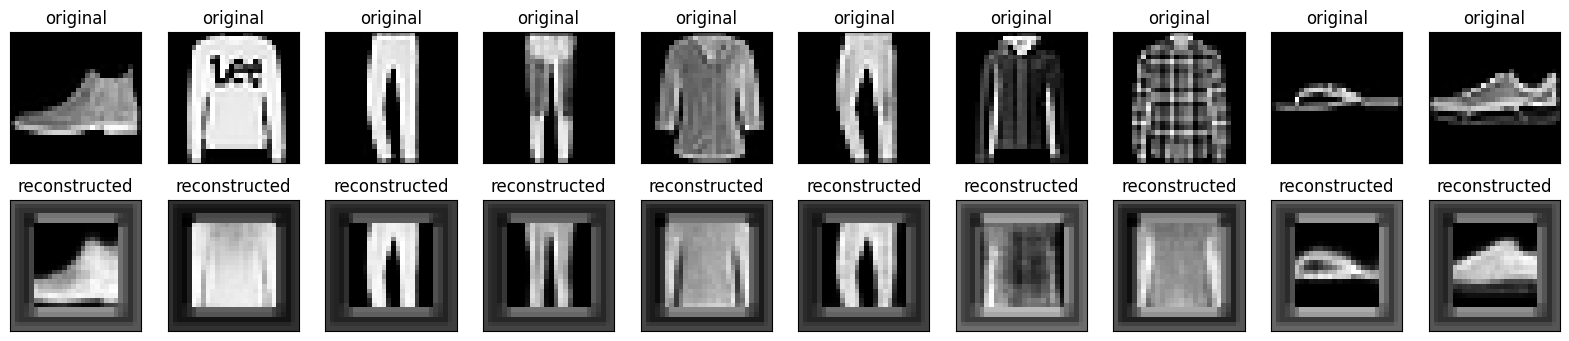

In [57]:
test_pred_y2 = autoencoder2.predict(test_images)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_pred_y2[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# section clustering for mnist data

In [32]:
encoder = Model(inputs, latent)
encoder.summary()

X_train_latent = encoder.predict(X_train)
X_valid_latent = encoder.predict(X_valid)
X_test_latent = encoder.predict(test_X)


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_20 (LeakyReLU)      │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_21 (LeakyReLU)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent (Dense)                  │ (None, 6)              │        18,822 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,638 (147.02 KB)

 Trainable params: 37,638 (147.02 KB)

 Non-trainable params: 0 (0.00 B)

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [36]:
print("Train latent shape:", X_train_latent.shape)
print("Valid latent shape:", X_valid_latent.shape)
print("Test latent shape:", X_test_latent.shape)

print("Train labels shape:", y_train.shape)
print("Valid labels shape:", y_valid.shape)
print("Test labels shape:", test_y.shape)

Train latent shape: (45000, 6)
Valid latent shape: (15000, 6)
Test latent shape: (10000, 6)
Train labels shape: (45000,)
Valid labels shape: (15000,)
Test labels shape: (10000,)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 5, Silhouette score: 0.22145713865756989


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 6, Silhouette score: 0.23743529617786407


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 7, Silhouette score: 0.24572421610355377


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 8, Silhouette score: 0.24767109751701355


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 9, Silhouette score: 0.23373368382453918


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 10, Silhouette score: 0.22637324035167694


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 11, Silhouette score: 0.22411386668682098


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 12, Silhouette score: 0.21449162065982819


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 13, Silhouette score: 0.20990800857543945


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 14, Silhouette score: 0.21168744564056396


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 15, Silhouette score: 0.21078243851661682


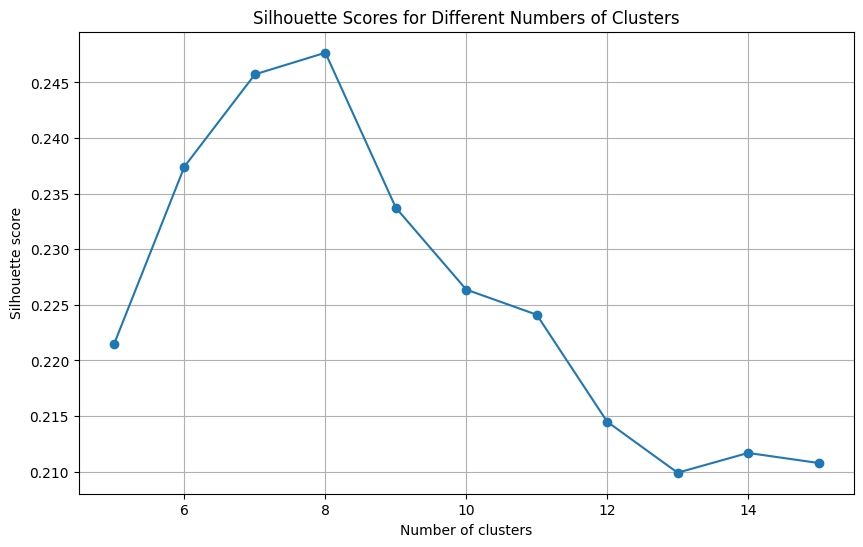

The optimal number of clusters is: 8


In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
X_all_latent = np.concatenate((X_train_latent, X_valid_latent, X_test_latent), axis=0)

silhouette_scores = []
cluster_range = range(5, 16)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_all_latent)
    silhouette_avg = silhouette_score(X_all_latent, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Number of clusters: {n_clusters}, Silhouette score: {silhouette_avg}")

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.grid(True)
plt.show()

optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters is: {optimal_clusters}")

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


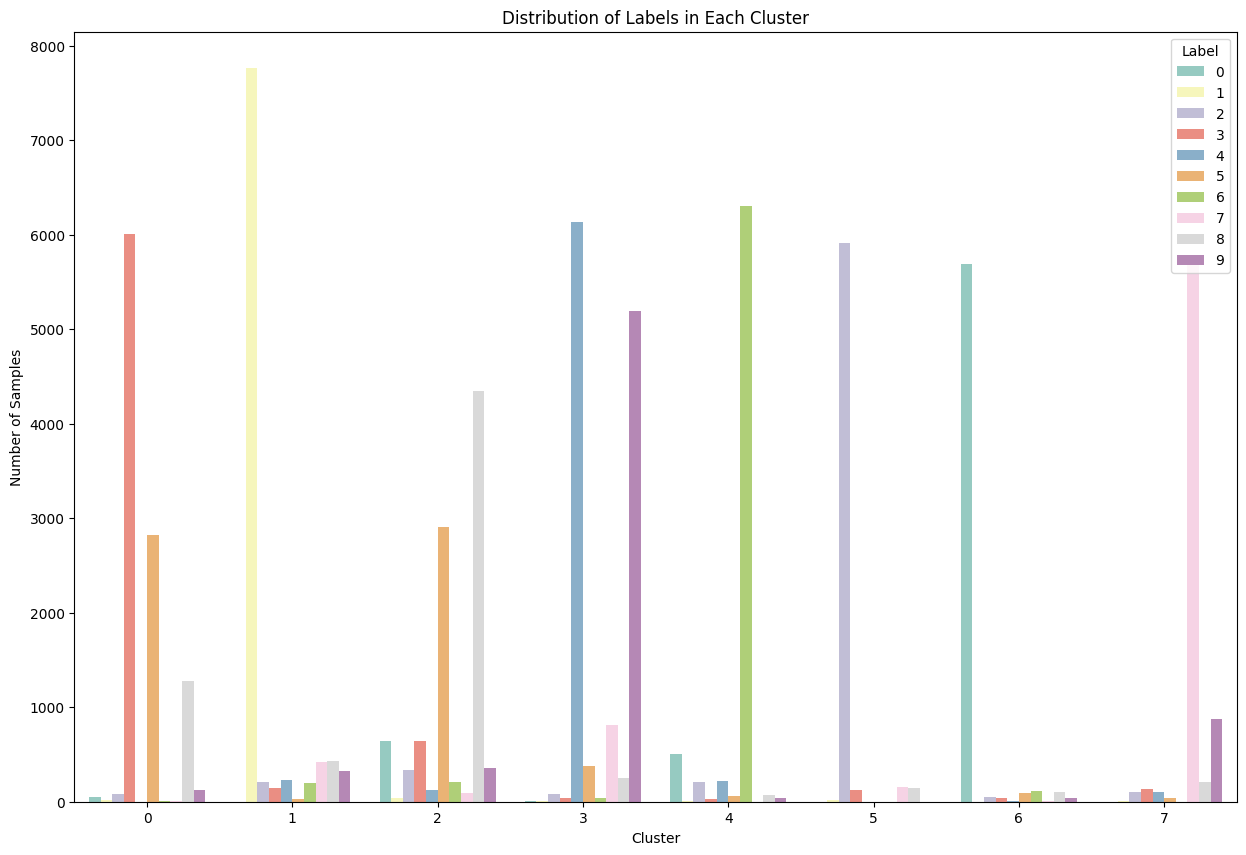

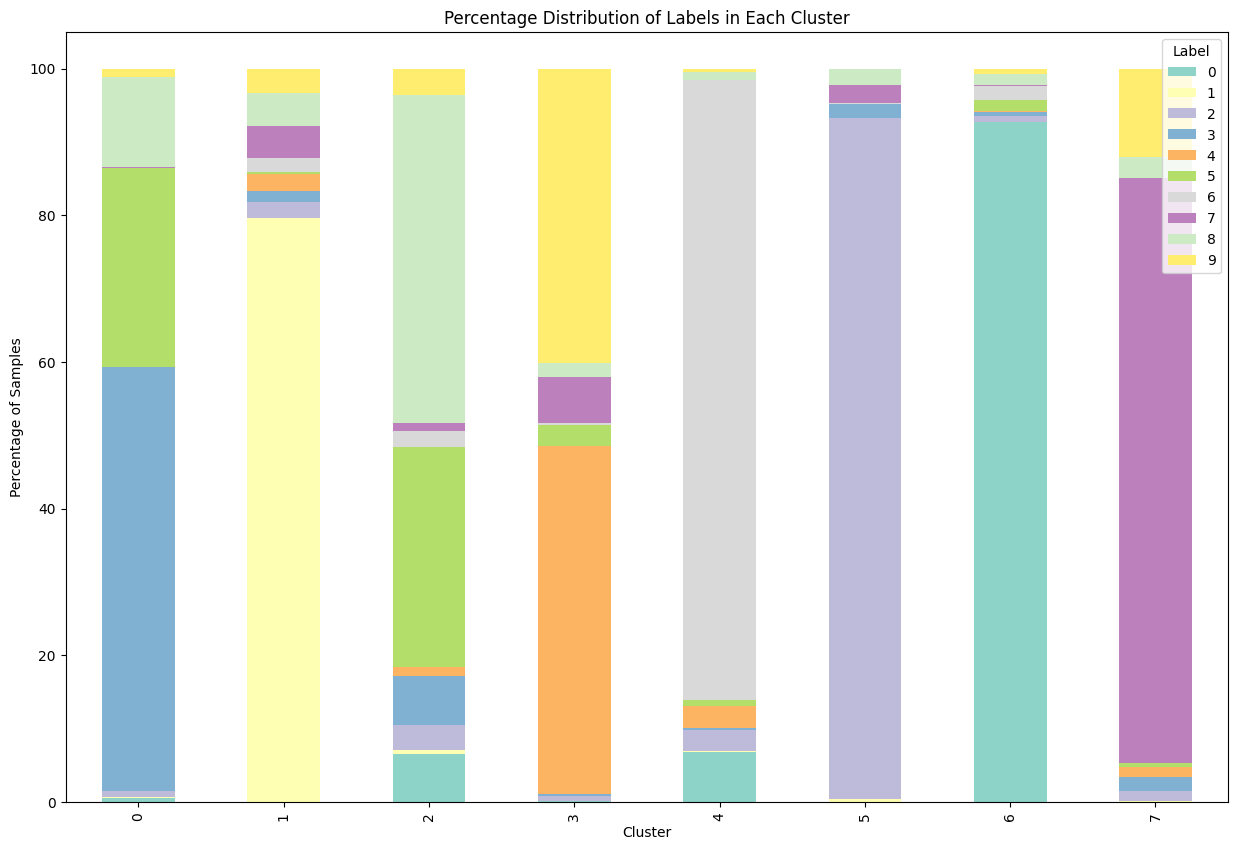

In [52]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_all_latent)
Y_all = np.concatenate((y_train, y_valid, test_y), axis=0)  

df = pd.DataFrame({'Cluster': cluster_labels, 'Label': Y_all})

plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='Cluster', hue='Label', palette='Set3')
plt.title('Distribution of Labels in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.legend(title='Label', loc='upper right')
plt.show()

cluster_distribution = df.groupby(['Cluster', 'Label']).size().unstack(fill_value=0)
cluster_percentages = cluster_distribution.div(cluster_distribution.sum(axis=1), axis=0) * 100

cluster_percentages.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='Set3')
plt.title('Percentage Distribution of Labels in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage of Samples')
plt.legend(title='Label', loc='upper right')
plt.show()

# clustering for fashion dataset

In [34]:
encoder = Model(inputs, latent)
encoder.summary()

x_train_latent = encoder.predict(Train_images)
x_valid_latent = encoder.predict(valid_images)
x_test_latent = encoder.predict(test_images)


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                           

Number of clusters: 5, Silhouette score: 0.31096121668815613
Number of clusters: 6, Silhouette score: 0.3633180558681488
Number of clusters: 7, Silhouette score: 0.3665386140346527
Number of clusters: 8, Silhouette score: 0.34576284885406494
Number of clusters: 9, Silhouette score: 0.32438573241233826
Number of clusters: 10, Silhouette score: 0.3292209208011627
Number of clusters: 11, Silhouette score: 0.31687474250793457
Number of clusters: 12, Silhouette score: 0.32281312346458435
Number of clusters: 13, Silhouette score: 0.3123166263103485
Number of clusters: 14, Silhouette score: 0.3073391020298004
Number of clusters: 15, Silhouette score: 0.3051620125770569


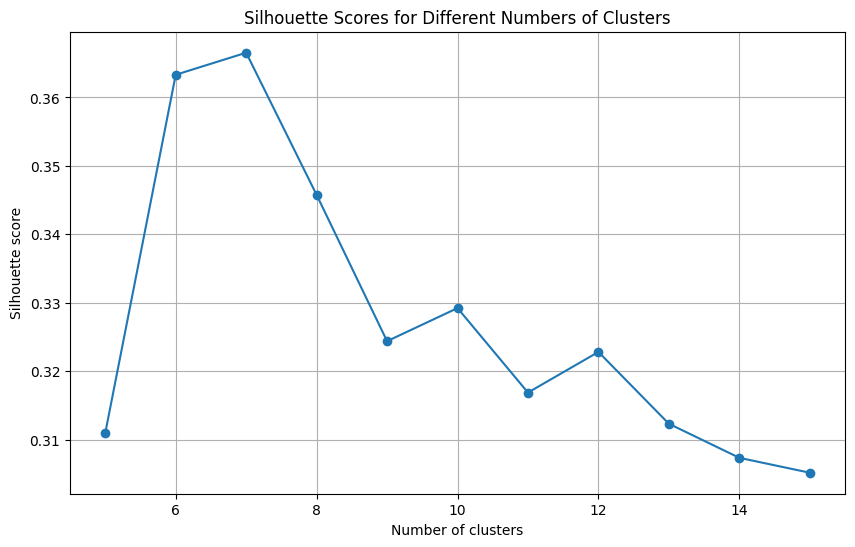

The optimal number of clusters is: 7


In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
x_all_latent = np.concatenate((x_train_latent, x_valid_latent, x_test_latent), axis=0)

silhouette_scores = []
cluster_range = range(5, 16)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(x_all_latent)
    silhouette_avg = silhouette_score(x_all_latent, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Number of clusters: {n_clusters}, Silhouette score: {silhouette_avg}")

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of clusters')

plt.ylabel('Silhouette score')
plt.grid(True)
plt.show()

optimal_clusters_fashion_data = cluster_range[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters is: {optimal_clusters_fashion_data}")

In [68]:
optimal_clusters_fashion_data = cluster_range[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters is: {optimal_clusters_fashion_data}")

The optimal number of clusters is: 7


In [69]:
print("Train latent shape:", x_train_latent.shape)
print("Valid latent shape:", x_valid_latent.shape)
print("Test latent shape:", test_labels.shape)

print("Train labels shape:", Train_labels.shape)
print("Valid labels shape:", valid_labels.shape)
print("Test labels shape:", test_labels.shape)

Train latent shape: (45000, 6)
Valid latent shape: (15000, 6)
Test latent shape: (10000,)
Train labels shape: (45000,)
Valid labels shape: (15000,)
Test labels shape: (10000,)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


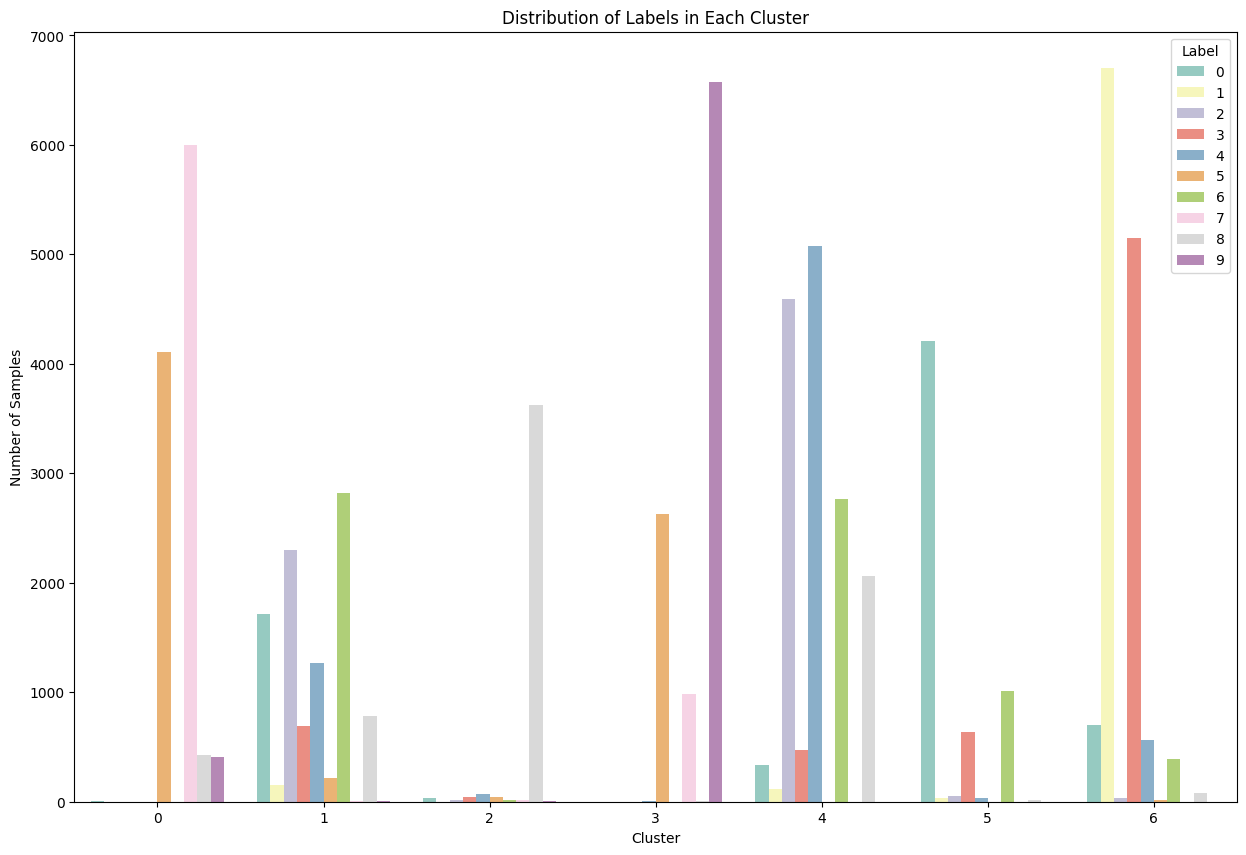

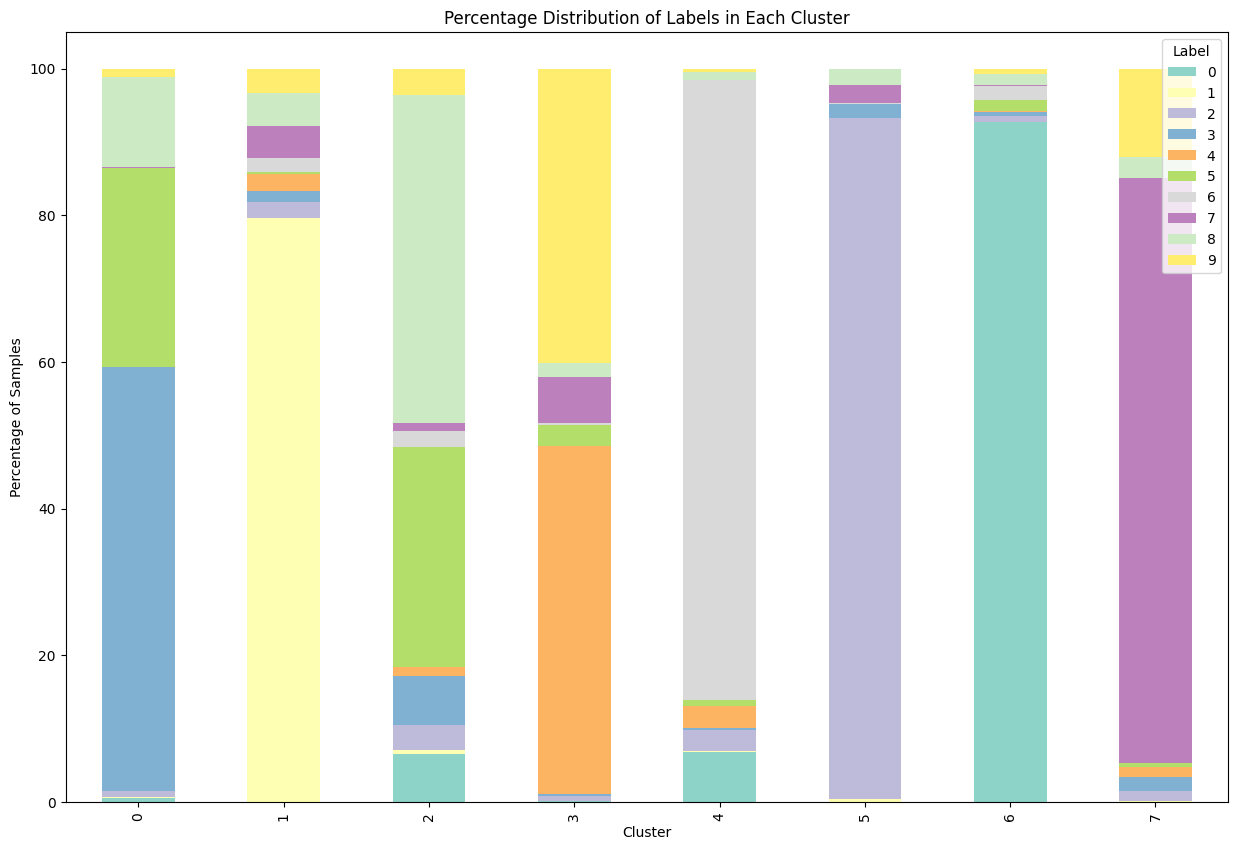

In [72]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


kmeans = KMeans(n_clusters=optimal_clusters_fashion_data, random_state=42)
cluster_labels1 = kmeans.fit_predict(x_all_latent)
y_all = np.concatenate((Train_labels, valid_labels, test_labels), axis=0)  
df_fashion = pd.DataFrame({'Cluster': cluster_labels1, 'Label': y_all})

plt.figure(figsize=(15, 10))
sns.countplot(data=df_fashion, x='Cluster', hue='Label', palette='Set3')
plt.title('Distribution of Labels in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.legend(title='Label', loc='upper right')
plt.show()

cluster_distribution = df.groupby(['Cluster', 'Label']).size().unstack(fill_value=0)
cluster_percentages = cluster_distribution.div(cluster_distribution.sum(axis=1), axis=0) * 100

cluster_percentages.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='Set3')
plt.title('Percentage Distribution of Labels in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage of Samples')
plt.legend(title='Label', loc='upper right')
plt.show()